In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [2]:
ds = pd.read_csv('movies_prerelease.csv')

In [3]:
ds

,Movie,Target,Budget,BoxOffice,Rating,Votes,Year,"rat_(0, 2]","rat_(2, 4]","rat_(4, 6]",...,s_Zakir Hussain,s_Zareen Khan,s_Zarina Wahab,s_Zayed Khan,s_Zeenat Aman,s_Zenia Starr,s_Zenobia Shroff,s_Zohra Sehgal,s_Zoya Afroz,s_Zoya Hussain
0,Batti Gul Meter Chalu,2,50.0,37.00,6.3,1552,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Dangal,6,90.0,370.00,8.5,105480,2016,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Manmarziyaan,3,30.0,26.00,7.0,1836,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Sui Dhaaga: Made in India,5,50.0,79.00,6.9,1342,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Stree,6,25.0,127.00,8.3,7801,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Manto,2,8.0,3.50,7.9,622,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Pataakha,2,20.0,6.50,7.7,392,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3 Idiots,6,55.0,202.00,8.4,282358,2009,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,PK,6,85.0,340.00,8.2,127703,2014,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Padman,5,40.0,81.00,8.1,10917,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#data = ds.drop(columns=['Movie', 'Budget', 'BoxOffice', 'Rating', 'Votes', 'Year', 'rat_(0, 2]', 'rat_(2, 4]', 'rat_(4, 6]',  'rat_(6, 8]', 'rat_(8, 10]'])
data = ds[[ 'BoxOffice', 'Target','Budget','Year']]
#data = ds.drop(columns=['Movie', 'BoxOffice', 'Rating', 'Votes', 'Year']).values
print(data.shape)
data = data.values

(986, 4)


In [19]:
for x in range(data.shape[0]):
    data[x][0] = data[x][0] + 26

In [20]:
## 70-30 Split randomized
split = int(0.7*data.shape[0])
np.random.shuffle(data)
X_train = data[:split, 1:]
Y_train = data[:split, 0]

X_test = data[split:, 1:]
Y_test = data[split:, 0]

print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

(690, 3) (690,)
(296, 3) (296,)


In [21]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
lm.score(X_test, Y_test)

0.7681188357700652

In [23]:
y_pred = lm.predict(X_test)
print(y_pred.shape)
for i in range(y_pred.shape[0]):
    print(y_pred[i], Y_test[i])

(296,)
148.27530591669938 116.2
40.66684158749058 34.0
21.491841000248996 33.0
10.776963524000962 27.5
14.198922430834614 28.0
47.51706160986896 35.0
98.36723002643043 148.0
195.80993619671915 156.0
63.11676212046132 49.0
24.602397022462696 33.0
17.564519848166924 32.0
21.128797171116503 30.0
183.01569103243128 222.0
108.10728065800583 124.0
17.763199753784193 30.0
92.49655739371383 101.0
96.0608347166633 92.0
79.22024321257993 51.7
44.19680292833823 37.0
53.835153334610595 47.0
154.45738143403594 175.0
42.41151316250796 38.0
180.98166208019336 327.0
1.086972173216168 26.8
28.586079664046224 31.0
68.47104975422985 54.0
14.555664051256258 30.0
80.95389203389766 60.0
124.82254476566482 115.0
100.60465942927453 108.0
22.001923790486217 33.0
18.43134425882579 31.0
78.40978029142252 68.0
10.878663749303996 29.0
39.30095714029426 35.0
19.54848951961435 29.75
45.05260458529733 34.0
12.408912120015543 26.2
35.40795197031423 32.0
18.43134425882579 33.0
67.40554543795383 68.0
330.13505886899156 

In [61]:
pickle.dump(lm, open('prerelease_lm2.pkl', 'wb'))

In [62]:
y = range(y_pred.shape[0])

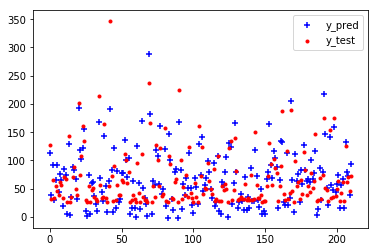

In [70]:
plt.scatter(y, y_pred, c='b', marker='+')
plt.scatter(y, Y_test, c='r', marker='.')
labels = ['y_pred', 'y_test']
plt.legend(labels)

In [22]:
import itertools
from sklearn import svm
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

0.990521327014218


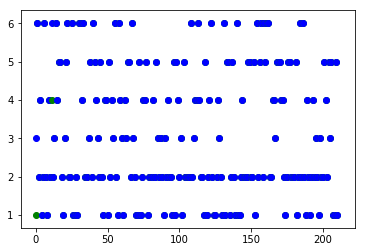

Normalized confusion matrix
[[1.         0.         0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.05263158 0.         0.94736842 0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.04       0.         0.96      ]]


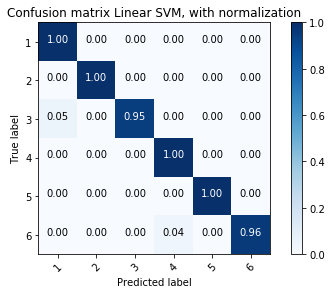

In [24]:
from sklearn.externals import joblib
svm_model_linear = svm.SVC(kernel = 'linear', C = 5).fit(X_train, Y_train)
svm_predictions = svm_model_linear.predict(X_test)
 
# model accuracy for X_test  
accuracy = svm_model_linear.score(X_test, Y_test)
print(accuracy)
# creating a confusion matrix
cm = confusion_matrix(Y_test, svm_predictions)

for ix in range(svm_predictions.shape[0]):
    plt.scatter(ix, svm_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=[1,2,3,4,5,6], normalize=True, title='Confusion matrix Linear SVM, with normalization')

pickle.dump(svm_model_linear, open('prerelease_svm.pkl', 'wb'))

In [61]:
loaded_model = pickle.load(open('prerelease_svm.pkl', 'rb'))
type(loaded_model)
result = loaded_model.predict(X_test)
print(result)

[2. 2. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 4. 2. 4. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4. 2. 2. 2. 2. 2. 4. 2. 2. 2. 2.
 2. 4. 2. 2. 2. 2. 2. 4. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 4. 2. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4.
 2. 2. 2. 2. 2. 4. 2. 2. 2. 2. 2. 2. 2. 4. 2. 2. 2. 4. 2.]


0.26066350710900477


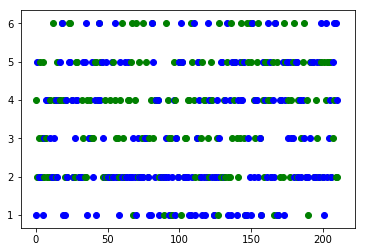

Normalized confusion matrix
[[0.12903226 0.16129032 0.12903226 0.22580645 0.19354839 0.16129032]
 [0.07246377 0.33333333 0.15942029 0.2173913  0.11594203 0.10144928]
 [0.04347826 0.17391304 0.2173913  0.2173913  0.2173913  0.13043478]
 [0.         0.28571429 0.08571429 0.22857143 0.37142857 0.02857143]
 [0.         0.2972973  0.21621622 0.16216216 0.27027027 0.05405405]
 [0.0625     0.125      0.0625     0.3125     0.125      0.3125    ]]


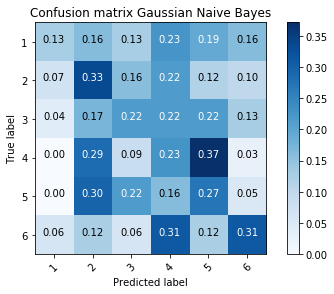

In [81]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, Y_train)
gnb_predictions = gnb.predict(X_test)
 
# accuracy for X_test
accuracy = gnb.score(X_test, Y_test)
print(accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(Y_test, gnb_predictions)

for ix in range(gnb_predictions.shape[0]):
    plt.scatter(ix, gnb_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=[1,2,3,4,5,6], normalize=True, title='Confusion matrix Gaussian Naive Bayes')

pickle.dump(gnb, open('prerelease_naivebayes.pkl', 'wb'))

0.26066350710900477


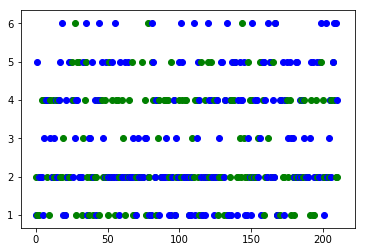

Normalized confusion matrix
[[0.25806452 0.4516129  0.03225806 0.19354839 0.06451613 0.        ]
 [0.13043478 0.46376812 0.04347826 0.27536232 0.07246377 0.01449275]
 [0.2173913  0.39130435 0.         0.26086957 0.08695652 0.04347826]
 [0.14285714 0.4        0.02857143 0.28571429 0.11428571 0.02857143]
 [0.10810811 0.37837838 0.08108108 0.32432432 0.10810811 0.        ]
 [0.1875     0.3125     0.0625     0.125      0.25       0.0625    ]]


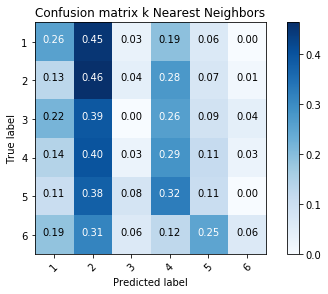

In [84]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7).fit(X_train, Y_train)
 
# accuracy on X_test
accuracy = knn.score(X_test, Y_test)
print (accuracy)
 
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(Y_test, knn_predictions)

for ix in range(knn_predictions.shape[0]):
    plt.scatter(ix, knn_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=[1,2,3,4,5,6], normalize=True, title='Confusion matrix k Nearest Neighbors')

pickle.dump(knn, open('prerelease_knn.pkl', 'wb'))

0.26540284360189575


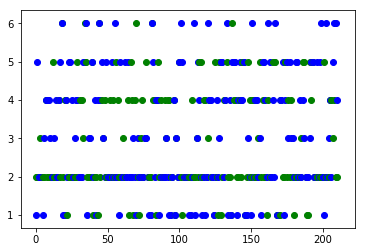

Normalized confusion matrix
[[0.19354839 0.64516129 0.         0.09677419 0.03225806 0.03225806]
 [0.13043478 0.43478261 0.07246377 0.27536232 0.08695652 0.        ]
 [0.04347826 0.39130435 0.2173913  0.08695652 0.26086957 0.        ]
 [0.08571429 0.48571429 0.         0.22857143 0.2        0.        ]
 [0.05405405 0.51351351 0.05405405 0.21621622 0.10810811 0.05405405]
 [0.         0.375      0.0625     0.1875     0.1875     0.1875    ]]


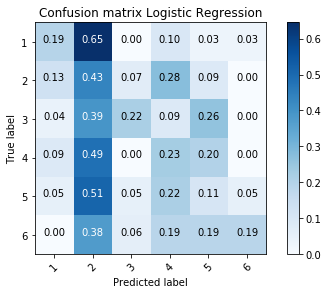

In [85]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, Y_train)
 
# accuracy on X_test
accuracy = lr.score(X_test, Y_test)
print (accuracy)
 
# creating a confusion matrix
lr_predictions = lr.predict(X_test) 
cm = confusion_matrix(Y_test, lr_predictions)

for ix in range(lr_predictions.shape[0]):
    plt.scatter(ix, lr_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=[1,2,3,4,5,6], normalize=True, title='Confusion matrix Logistic Regression')

pickle.dump(lr, open('prerelease_logreg.pkl', 'wb'))

0.3080568720379147


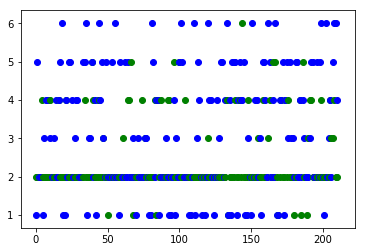

Normalized confusion matrix
[[0.06451613 0.90322581 0.         0.03225806 0.         0.        ]
 [0.05797101 0.75362319 0.05797101 0.11594203 0.01449275 0.        ]
 [0.04347826 0.69565217 0.08695652 0.17391304 0.         0.        ]
 [0.02857143 0.65714286 0.         0.2        0.08571429 0.02857143]
 [0.         0.72972973 0.02702703 0.18918919 0.05405405 0.        ]
 [0.         0.5625     0.125      0.25       0.0625     0.        ]]


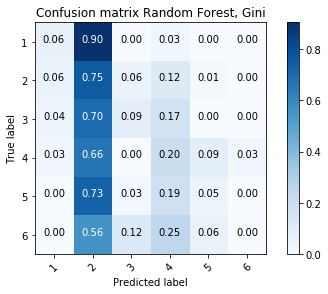

In [86]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=40, warm_start=True).fit(X_train, Y_train)
 
# accuracy on X_test
accuracy = rf.score(X_test, Y_test)
print (accuracy)
 
# creating a confusion matrix
rf_predictions = rf.predict(X_test) 
cm = confusion_matrix(Y_test, rf_predictions)

for ix in range(rf_predictions.shape[0]):
    plt.scatter(ix, rf_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=[1,2,3,4,5,6], normalize=True, title='Confusion matrix Random Forest, Gini')

pickle.dump(rf, open('prerelease_randfor.pkl', 'wb'))

0.2985781990521327


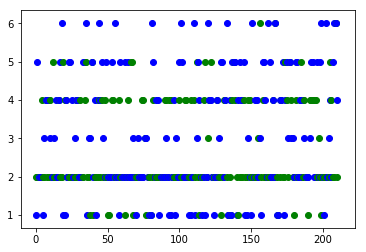

Normalized confusion matrix
[[0.12903226 0.64516129 0.         0.16129032 0.06451613 0.        ]
 [0.07246377 0.62318841 0.02898551 0.2173913  0.05797101 0.        ]
 [0.13043478 0.47826087 0.04347826 0.26086957 0.04347826 0.04347826]
 [0.05714286 0.57142857 0.         0.28571429 0.08571429 0.        ]
 [0.05405405 0.48648649 0.         0.37837838 0.08108108 0.        ]
 [0.0625     0.5625     0.0625     0.125      0.0625     0.125     ]]


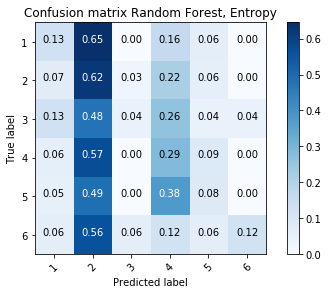

In [109]:
rf = RandomForestClassifier(n_estimators=20, criterion='entropy', warm_start=True).fit(X_train, Y_train)
 
# accuracy on X_test
accuracy = rf.score(X_test, Y_test)
print (accuracy)
 
# creating a confusion matrix
rf_predictions = rf.predict(X_test) 
cm = confusion_matrix(Y_test, rf_predictions)

for ix in range(rf_predictions.shape[0]):
    plt.scatter(ix, rf_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=[1,2,3,4,5,6], normalize=True, title='Confusion matrix Random Forest, Entropy')

pickle.dump(rf, open('prerelease_randfor2.pkl', 'wb'))

In [87]:
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.utils import np_utils

Using TensorFlow backend.


In [95]:
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)
print(Y_train.shape, y_train.shape)

(492,) (492, 7)


In [105]:
model = Sequential()
model.add(Dense(800, input_shape=(1505,)))
model.add(Activation('relu'))
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(7))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 800)               1204800   
_________________________________________________________________
activation_11 (Activation)   (None, 800)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 200)               160200    
_________________________________________________________________
activation_12 (Activation)   (None, 200)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 50)                10050     
_________________________________________________________________
activation_13 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 7)                 357       
__________

In [106]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [107]:
model.fit(X_train, y_train, batch_size=10, epochs=50, validation_data=[X_test, y_test])

Train on 492 samples, validate on 211 samples
Epoch 1/50
492/492 [==============================] - 3s 6ms/step - loss: 1.7721 - acc: 0.2703 - val_loss: 1.7037 - val_acc: 0.3128
Epoch 2/50
492/492 [==============================] - 2s 4ms/step - loss: 1.2946 - acc: 0.5447 - val_loss: 1.8001 - val_acc: 0.2796
Epoch 3/50
492/492 [==============================] - 2s 4ms/step - loss: 0.4026 - acc: 0.9309 - val_loss: 2.2146 - val_acc: 0.2417
Epoch 4/50
492/492 [==============================] - 2s 4ms/step - loss: 0.0688 - acc: 0.9837 - val_loss: 2.5343 - val_acc: 0.2891
Epoch 5/50
492/492 [==============================] - 2s 4ms/step - loss: 0.0302 - acc: 0.9959 - val_loss: 2.6563 - val_acc: 0.2796
Epoch 6/50
492/492 [==============================] - 2s 4ms/step - loss: 0.0043 - acc: 1.0000 - val_loss: 2.7736 - val_acc: 0.2796
Epoch 7/50
492/492 [==============================] - 2s 4ms/step - loss: 0.0022 - acc: 1.0000 - val_loss: 2.8174 - val_acc: 0.2796
Epoch 8/50
492/492 [==========